In [1]:
import numpy as np
import sklearn
import matplotlib.pyplot as plt
from keras.utils import to_categorical
import torch
import pandas as pd
import keras

In [2]:
keras.__version__

'2.15.0'

In [3]:
#Loading data
from keras.datasets import mnist
(train_X, train_Y), (test_X, test_Y) = mnist.load_data()

In [4]:
# Verify data
print("Shape of Train Dataset:", train_X.shape)
print("Shape of Test Dataset:", test_X.shape)

Shape of Train Dataset: (60000, 28, 28)
Shape of Test Dataset: (10000, 28, 28)


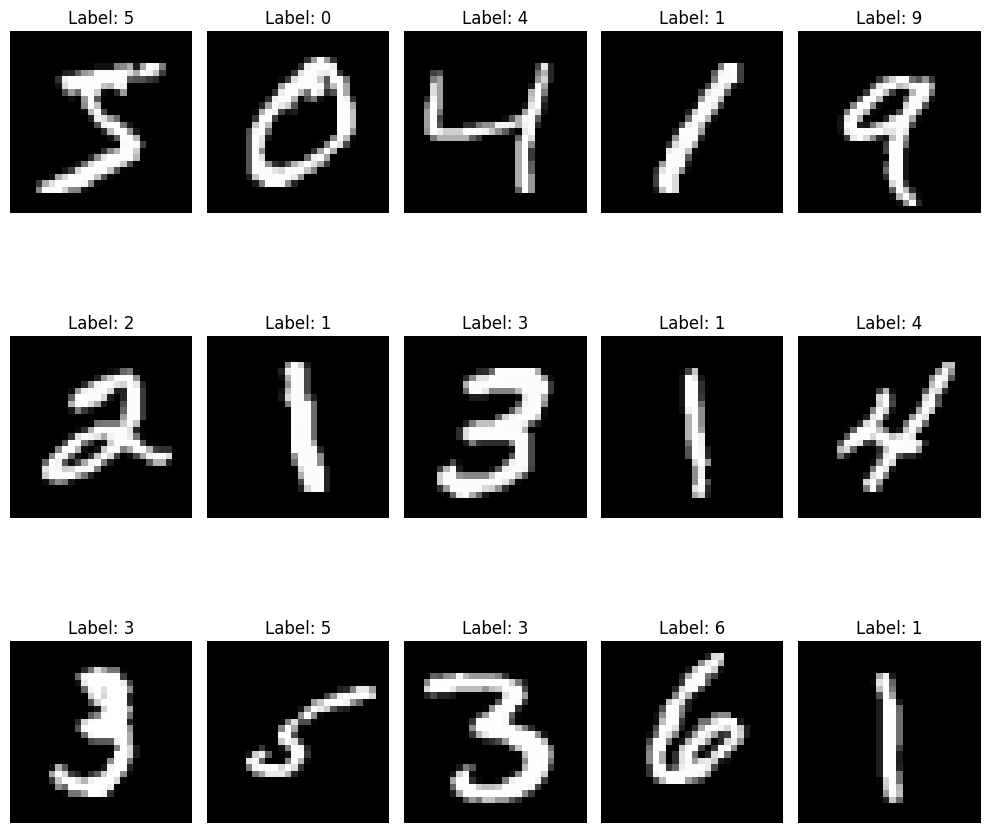

In [5]:
# Display the first 15 images from the training dataset
import matplotlib.pyplot as plt 
plt.figure(figsize=(10, 10)) 
for i in range(15):
    plt.subplot(3, 5, i+1) 
    plt.imshow(train_X[i], cmap='gray') 
    plt.title(f"Label: {train_Y[i]}") 
    plt.axis('off')
plt.tight_layout()
plt.show()

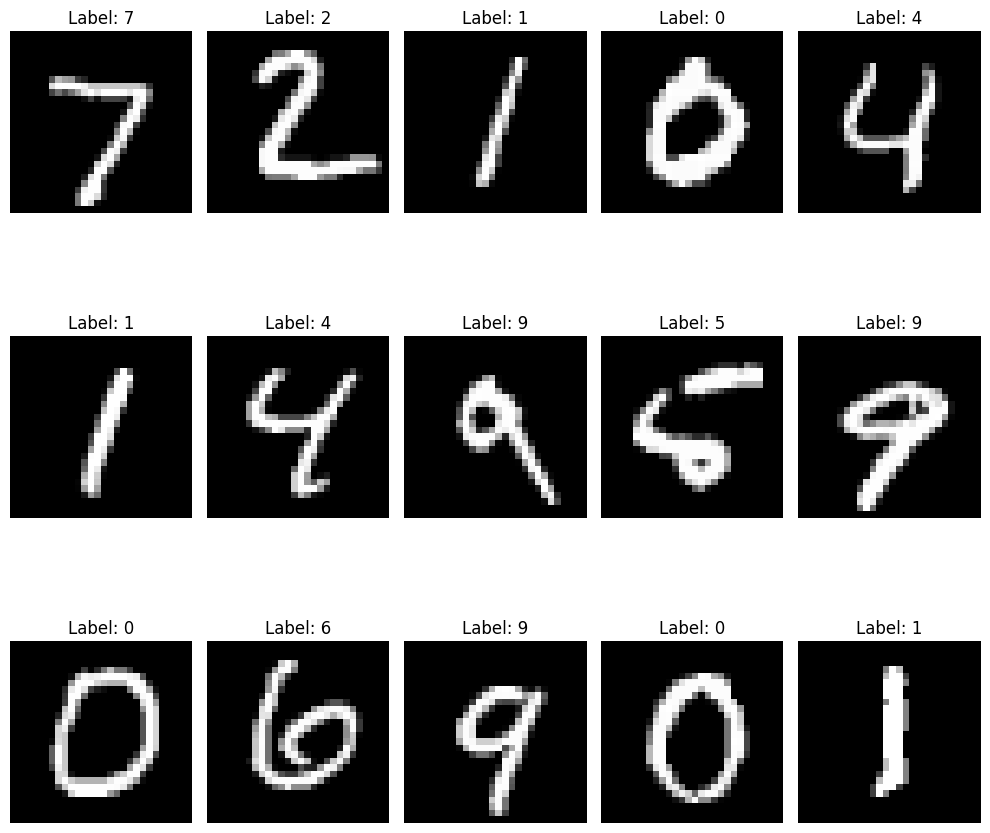

In [82]:
# Display the first 15 images from the testing dataset
import matplotlib.pyplot as plt 
plt.figure(figsize=(10, 10)) 
for i in range(15):
    plt.subplot(3, 5, i+1) 
    plt.imshow(test_X[i], cmap='gray') 
    plt.title(f"Label: {test_Y[i]}") 
    plt.axis('off')
plt.tight_layout()
plt.show()

In [6]:
def preprocess_data(train_data, train_labels, test_data, test_labels):
    # Reshape the input data
    train_data = train_data.reshape((train_data.shape[0], 28, 28, 1))
    test_data = test_data.reshape((test_data.shape[0], 28, 28, 1))

    # Convert output labels to one-hot vectors
    train_labels = to_categorical(train_labels)
    test_labels = to_categorical(test_labels)

    # Scale pixel values between 0.0 and 1.0
    train_data = train_data.astype('float32') / 255.0
    test_data = test_data.astype('float32') / 255.0

    return train_data, train_labels, test_data, test_labels


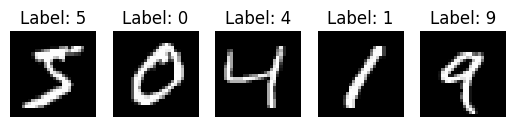

In [7]:
# Example usage:
# Assuming you have loaded your train and test datasets as train_data, train_labels, test_data, test_labels
# Replace these variables with your actual dataset variables

# Call the preprocessing function
train_X, train_Y, test_X, test_Y = preprocess_data(train_X, train_Y, test_X, test_Y)

# Visualize some images using imshow() function
# For example, let's visualize the first five images in the training dataset
for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.imshow(train_X[i, :, :, 0], cmap='gray')
    plt.title(f'Label: {np.argmax(train_Y[i])}')  # Display the corresponding label
    plt.axis('off')

plt.show()

In [8]:
from keras.models import Sequential 
from keras.layers import Conv2D
from keras.layers import MaxPooling2D 
from keras.layers import Dense 
from keras.layers import Flatten 
from keras.optimizers import SGD 

def create_cnn():
    
    # define using Sequential 
    model = Sequential()

    # Convolution layer 
    model.add(
        Conv2D(32, (3,3),
        activation='relu', 
        kernel_initializer = 'he_uniform',
        input_shape=(28,28,1))
    )
    # Maxpooling layer 
    model.add(MaxPooling2D((2,2)))
    
    # Flatten output 
    model.add(Flatten())
    
    # Dense layer of 100 neurons 
    model.add(
        Dense(100, 
        activation='relu', kernel_initializer = 'he_uniform')
    )
    
    model.add(Dense(10, activation='softmax')) 
    
    # initialize optimizer 
    opt = SGD(lr = 0.01, momentum=0.9) 
    
    # compile model
    model.compile(
        optimizer = opt,
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )
    
    return model

In [9]:
model = create_cnn()

print("Model Layers: ", model.layers)


Model Layers:  [<keras.src.layers.convolutional.conv2d.Conv2D object at 0x28b517ed0>, <keras.src.layers.pooling.max_pooling2d.MaxPooling2D object at 0x28b6bbb10>, <keras.src.layers.reshaping.flatten.Flatten object at 0x28b517450>, <keras.src.layers.core.dense.Dense object at 0x28b575ad0>, <keras.src.layers.core.dense.Dense object at 0x28b577990>]


In [87]:
print("Model summary:", model.summary())

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 13, 13, 32)        0         
 g2D)                                                            
                                                                 
 flatten_2 (Flatten)         (None, 5408)              0         
                                                                 
 dense_4 (Dense)             (None, 100)               540900    
                                                                 
 dense_5 (Dense)             (None, 10)                1010      
                                                                 
Total params: 542230 (2.07 MB)
Trainable params: 542230 (2.07 MB)
Non-trainable params: 0 (0.00 Byte)
__________________

In [10]:
print("Fit Model on Training Data:")
epoch_history = model.fit(train_X, train_Y, batch_size=32, epochs=10, validation_split =0.1)
# print validation and training accuracy over epochs 
print("Accuracy (10 Epochs):", epoch_history.history['accuracy']) 
print("Validation Accuracy (10 Epochs) :", epoch_history.history['val_accuracy']) 


Fit Model on Training Data:
Epoch 1/10
1688/1688 [==============================] - 8s 4ms/step - loss: 0.1730 - accuracy: 0.9478 - val_loss: 0.0687 - val_accuracy: 0.9825
Epoch 2/10
1688/1688 [==============================] - 7s 4ms/step - loss: 0.0591 - accuracy: 0.9819 - val_loss: 0.0605 - val_accuracy: 0.9817
Epoch 3/10
1688/1688 [==============================] - 7s 4ms/step - loss: 0.0386 - accuracy: 0.9882 - val_loss: 0.0561 - val_accuracy: 0.9838
Epoch 4/10
1688/1688 [==============================] - 8s 5ms/step - loss: 0.0260 - accuracy: 0.9924 - val_loss: 0.0445 - val_accuracy: 0.9875
Epoch 5/10
1688/1688 [==============================] - 7s 4ms/step - loss: 0.0180 - accuracy: 0.9946 - val_loss: 0.0511 - val_accuracy: 0.9857
Epoch 6/10
1688/1688 [==============================] - 8s 5ms/step - loss: 0.0120 - accuracy: 0.9968 - val_loss: 0.0415 - val_accuracy: 0.9880
Epoch 7/10
1688/1688 [==============================] - 7s 4ms/step - loss: 0.0085 - accuracy: 0.9979 - val_

In [11]:
score = model.evaluate(test_X, test_Y, verbose=0)
print("Score After 10 Epochs: ", model.metrics_names, score) 
print(f"Test Accuracy: {score[1]*100}%")

Score After 10 Epochs:  ['loss', 'accuracy'] [0.03943201154470444, 0.9879999756813049]
Test Accuracy: 98.7999975681305%


In [12]:
# Experiment 
keras.backend.clear_session()

In [13]:
model = create_cnn()
epoch_history = model. fit (train_X , train_Y , batch_size=32, epochs=50, validation_split =0.1)
# print validation and training accuracy over epochs
print(epoch_history.history['accuracy']) 
print(epoch_history.history['val_accuracy'])

Epoch 1/50
1688/1688 [==============================] - 7s 4ms/step - loss: 0.1776 - accuracy: 0.9462 - val_loss: 0.0848 - val_accuracy: 0.9752
Epoch 2/50
1688/1688 [==============================] - 7s 4ms/step - loss: 0.0580 - accuracy: 0.9831 - val_loss: 0.0601 - val_accuracy: 0.9832
Epoch 3/50
1688/1688 [==============================] - 7s 4ms/step - loss: 0.0359 - accuracy: 0.9893 - val_loss: 0.0499 - val_accuracy: 0.9865
Epoch 4/50
1688/1688 [==============================] - 7s 4ms/step - loss: 0.0245 - accuracy: 0.9925 - val_loss: 0.0447 - val_accuracy: 0.9885
Epoch 5/50
1688/1688 [==============================] - 7s 4ms/step - loss: 0.0167 - accuracy: 0.9951 - val_loss: 0.0459 - val_accuracy: 0.9885
Epoch 6/50
1688/1688 [==============================] - 7s 4ms/step - loss: 0.0115 - accuracy: 0.9969 - val_loss: 0.0437 - val_accuracy: 0.9898
Epoch 7/50
1688/1688 [==============================] - 7s 4ms/step - loss: 0.0078 - accuracy: 0.9982 - val_loss: 0.0586 - val_accuracy:

In [14]:
score = model.evaluate(test_X, test_Y, verbose=0) 
print("Score After 50 Epochs: ", model.metrics_names, score) 
print(f"Test Accuracy (50 Epochs): {score[1]*100}%")

Score After 50 Epochs:  ['loss', 'accuracy'] [0.0499705895781517, 0.9890999794006348]
Test Accuracy (50 Epochs): 98.90999794006348%


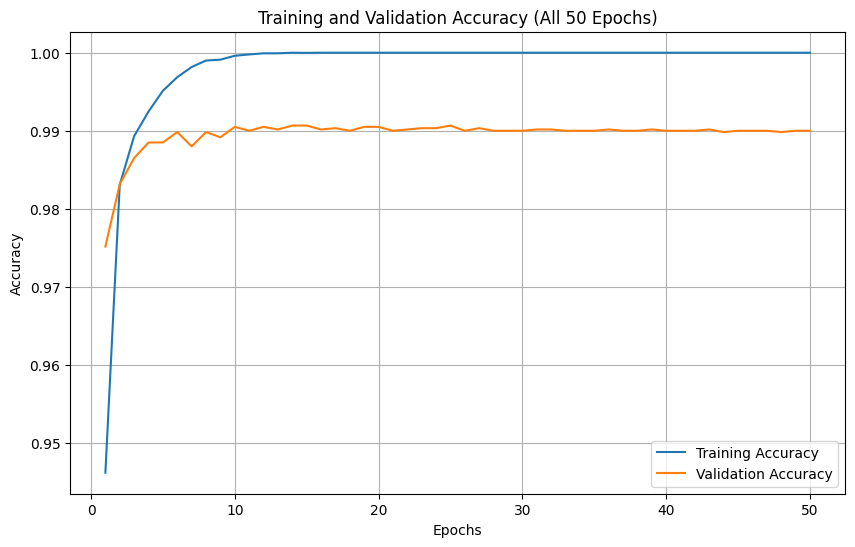

In [16]:
# Plot accuracy and validation accuracy for all epochs
# Creating a plot
epochs = np.arange(0, 50)
training_accuracy = epoch_history.history['accuracy'] 
validation_accuracy = epoch_history.history['val_accuracy'] 
epochs = [i+1 for i in epochs]
plt.figure(figsize=(10, 6))
plt.plot(epochs, training_accuracy, label='Training Accuracy', linestyle='-')
plt.plot(epochs, validation_accuracy, label='Validation Accuracy', linestyle='-')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy (All 50 Epochs)') 
plt.legend()
plt.grid(True) 
# Show the plot 
plt.show()

In [17]:
# Selecting data points for every 10th epoch
selected_epochs = [0] + list(np.arange(9, 50, 10))
training_accuracy = epoch_history.history['accuracy']
validation_accuracy = epoch_history.history['val_accuracy']
selected_training_acc = [training_accuracy[i] for i in selected_epochs] 
selected_validation_acc = [validation_accuracy[i] for i in selected_epochs]

In [18]:
# For the formatting purpose
selected_epochs = [i+1 for i in selected_epochs] 
selected_epochs

[1, 10, 20, 30, 40, 50]

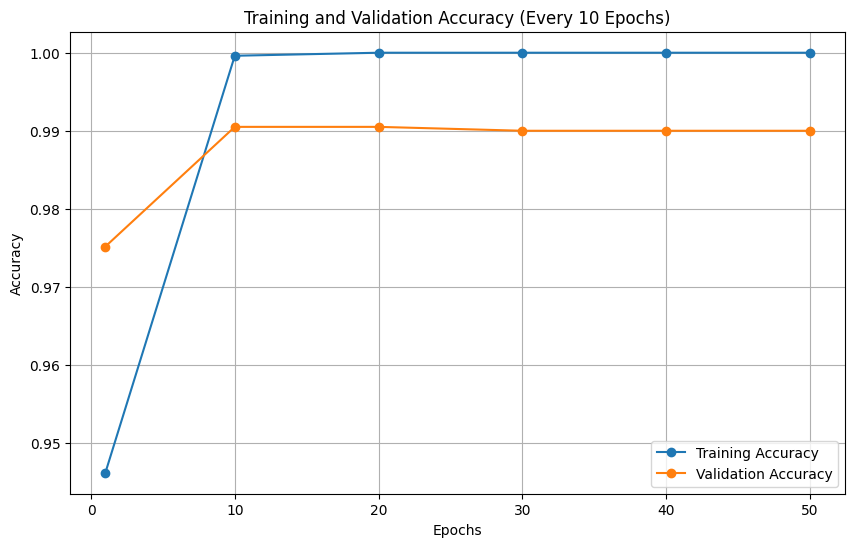

In [24]:
# Creating a plot
plt.figure(figsize=(10, 6))
plt.plot(selected_epochs, selected_training_acc, label='Training Accuracy',marker='o', linestyle='-')
plt.plot(selected_epochs, selected_validation_acc, label='Validation Accuracy',marker='o', linestyle='-')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy (Every 10 Epochs)')
plt.legend() 
plt.grid(True)
# Show the plot
plt.show()

In [25]:
keras.backend.clear_session()

In [26]:
from keras.layers import Dropout

def create_cnn():
    
    # define using Sequential 
    model = Sequential()

    # Convolution layer 
    model.add(
        Conv2D(32, (3,3),
        activation='relu', 
        kernel_initializer = 'he_uniform',
        input_shape=(28,28,1))
    )
    # Maxpooling layer 
    model.add(MaxPooling2D((2,2)))
    
    # Flatten output 
    model.add(Flatten())
    
    # Drop out some units 
    model.add(Dropout(0.5))
    
    # Dense layer of 100 neurons 
    model.add(
        Dense(100, 
        activation='relu', kernel_initializer = 'he_uniform')
    )
    
    model.add(Dense(10, activation='softmax')) 
    
    # initialize optimizer 
    opt = SGD(lr = 0.01, momentum=0.9) 
    
    # compile model
    model.compile(
        optimizer = opt,
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )
    
    return model

In [27]:
#Check the model
model_dropout = create_cnn()
print("Model Layers (With Drop Out): ", model_dropout.layers)

Model Layers (With Drop Out):  [<keras.src.layers.convolutional.conv2d.Conv2D object at 0x28b612e50>, <keras.src.layers.pooling.max_pooling2d.MaxPooling2D object at 0x28e3b0bd0>, <keras.src.layers.reshaping.flatten.Flatten object at 0x28e37ef50>, <keras.src.layers.regularization.dropout.Dropout object at 0x28f231950>, <keras.src.layers.core.dense.Dense object at 0x28e405950>, <keras.src.layers.core.dense.Dense object at 0x28e405850>]


In [28]:
print("Model summary (With Drop Out):", model_dropout.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 5408)              0         
                                                                 
 dropout (Dropout)           (None, 5408)              0         
                                                                 
 dense (Dense)               (None, 100)               540900    
                                                                 
 dense_1 (Dense)             (None, 10)                1010      
                                                        

In [30]:
#Run the model
print("Fit the New Model on Training Data (With Drop Out)")
epoch_history_dropout=model_dropout.fit(train_X,train_Y,batch_size=32,epochs=50, validation_split=0.1)
# print validation and training accuracy over epochs
print("Accuracy (With Drop Out):", epoch_history_dropout.history['accuracy']) 
print("Validation Accuracy (With Drop Out):", epoch_history_dropout.history['val_accuracy'])

Fit the New Model on Training Data (With Drop Out)
Epoch 1/50
1688/1688 [==============================] - 9s 5ms/step - loss: 0.2458 - accuracy: 0.9217 - val_loss: 0.0786 - val_accuracy: 0.9768
Epoch 2/50
1688/1688 [==============================] - 9s 6ms/step - loss: 0.0961 - accuracy: 0.9700 - val_loss: 0.0510 - val_accuracy: 0.9858
Epoch 3/50
1688/1688 [==============================] - 10s 6ms/step - loss: 0.0672 - accuracy: 0.9796 - val_loss: 0.0450 - val_accuracy: 0.9875
Epoch 4/50
1688/1688 [==============================] - 9s 5ms/step - loss: 0.0568 - accuracy: 0.9821 - val_loss: 0.0399 - val_accuracy: 0.9897
Epoch 5/50
1688/1688 [==============================] - 10s 6ms/step - loss: 0.0469 - accuracy: 0.9851 - val_loss: 0.0411 - val_accuracy: 0.9887
Epoch 6/50
1688/1688 [==============================] - 9s 6ms/step - loss: 0.0404 - accuracy: 0.9868 - val_loss: 0.0399 - val_accuracy: 0.9895
Epoch 7/50
1688/1688 [==============================] - 9s 5ms/step - loss: 0.0358 

In [31]:
score = model_dropout.evaluate(test_X, test_Y, verbose=0)
print("Score After 50 Epochs (With Drop Out): ", model_dropout.metrics_names,score)
print(f"Test Accuracy (With Drop Out): {score[1]*100}%")

Score After 50 Epochs (With Drop Out):  ['loss', 'accuracy'] [0.044963378459215164, 0.9891999959945679]
Test Accuracy (With Drop Out): 98.91999959945679%


In [32]:
#Gain new accuracy
training_accuracy_dropout = epoch_history_dropout.history['accuracy']
validation_accuracy_dropout = epoch_history_dropout.history['val_accuracy']

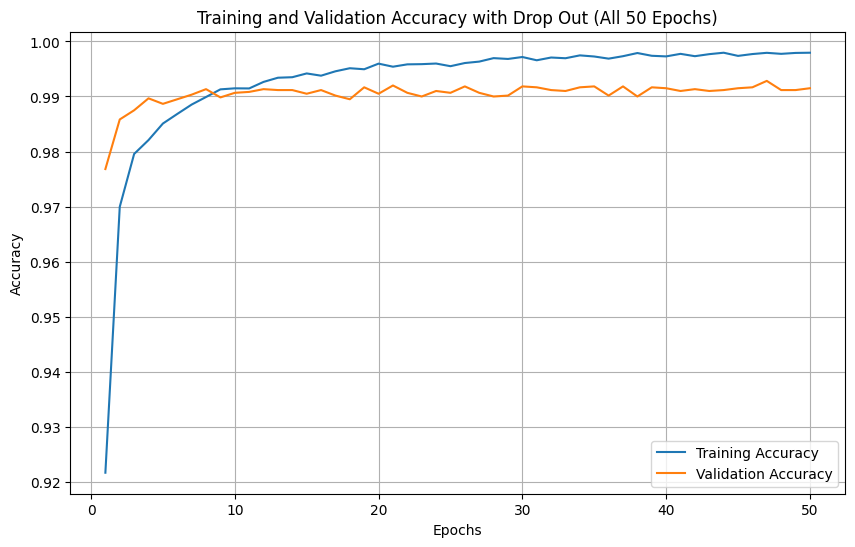

In [35]:
# Plot accuracy and validation accuracy for all epochs 
# Creating a plot
epochs = np.arange(0, 50)
epochs = [i+1 for i in epochs] 
plt.figure(figsize=(10, 6))
plt.plot(epochs, training_accuracy_dropout, label='Training Accuracy',linestyle='-')
plt.plot(epochs, validation_accuracy_dropout, label='Validation Accuracy',linestyle='-')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy with Drop Out (All 50 Epochs)') 
plt.legend()
plt.grid(True)
# Show the plot
plt.show()

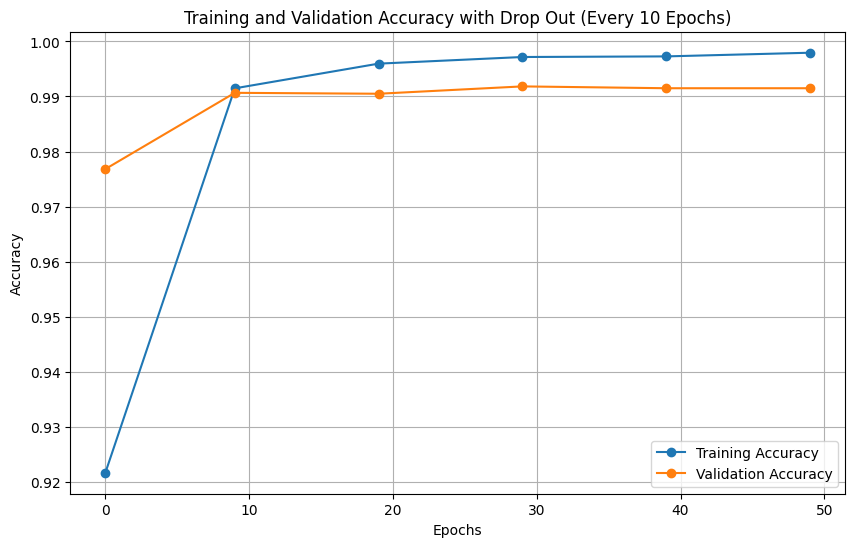

In [36]:
# Selecting data points for every 10th epoch
selected_epochs = [0] + list(np.arange(9, 50, 10)) 
selected_training_acc_dropout = [training_accuracy_dropout[i] for i in selected_epochs]
selected_validation_acc_dropout = [validation_accuracy_dropout[i] for i in selected_epochs]

# Creating a plot
plt.figure(figsize=(10, 6))
plt.plot(selected_epochs, selected_training_acc_dropout, label='Training Accuracy', marker='o', linestyle='-')
plt.plot(selected_epochs, selected_validation_acc_dropout, label='Validation Accuracy', marker='o', linestyle='-')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy with Drop Out (Every 10 Epochs)') 
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

In [37]:
keras.backend.clear_session()

In [38]:
def create_cnn_another_conv_maxpool(): 
    
    #define using Sequential 
    model=Sequential()
    
    #Convolution layer
    model.add( Conv2D(32,(3,3), activation='relu',kernel_initializer='he_uniform', input_shape=(28,28,1)) )
    
    #Maxpooling layer
    model.add(MaxPooling2D((2,2)))
    
    # Second Convolutional layer (added)
    model.add(Conv2D(64, (3, 3), activation='relu',kernel_initializer='he_uniform'))
    
    # Second Maxpooling layer (added)
    model.add(MaxPooling2D((2, 2)))
    
    # Flatten output
    model.add(Flatten()) 
    
    # Dropout layer 
    model.add(Dropout(0.5))
    
    # Dense layer of 100 neurons
    model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dense(10,activation='softmax'))
    
    # initialize optimizer
    opt=SGD(learning_rate=0.01,momentum=0.9)
    
    #compile model
    model.compile( optimizer=opt, loss='categorical_crossentropy',metrics=['accuracy']) 
    return model

In [39]:
print("Fit the New Model on Training Data (Adding Another Convolution Layer and Max Pooling Layer)")
model_another_conv_maxpool = create_cnn_another_conv_maxpool()
epoch_history_another_conv_maxpool= model_another_conv_maxpool.fit(train_X,train_Y, batch_size=32, epochs=10, validation_split=0.1)

# print validation and training accuracy over epochs
print("Accuracy (With Drop Out):", epoch_history_another_conv_maxpool.history['accuracy'])
print("Validation Accuracy (With Drop Out):",epoch_history_another_conv_maxpool.history['val_accuracy'])

Fit the New Model on Training Data (Adding Another Convolution Layer and Max Pooling Layer)
Epoch 1/10
1688/1688 [==============================] - 11s 6ms/step - loss: 0.1978 - accuracy: 0.9381 - val_loss: 0.0521 - val_accuracy: 0.9852
Epoch 2/10
1688/1688 [==============================] - 11s 6ms/step - loss: 0.0818 - accuracy: 0.9735 - val_loss: 0.0436 - val_accuracy: 0.9882
Epoch 3/10
1688/1688 [==============================] - 11s 6ms/step - loss: 0.0608 - accuracy: 0.9802 - val_loss: 0.0333 - val_accuracy: 0.9888
Epoch 4/10
1688/1688 [==============================] - 11s 6ms/step - loss: 0.0515 - accuracy: 0.9838 - val_loss: 0.0342 - val_accuracy: 0.9905
Epoch 5/10
1688/1688 [==============================] - 11s 6ms/step - loss: 0.0447 - accuracy: 0.9860 - val_loss: 0.0314 - val_accuracy: 0.9912
Epoch 6/10
1688/1688 [==============================] - 11s 6ms/step - loss: 0.0399 - accuracy: 0.9869 - val_loss: 0.0294 - val_accuracy: 0.9915
Epoch 7/10
1688/1688 [================

In [40]:
keras.backend.clear_session()

In [41]:
def create_cnn_another_conv_maxpool_new_lr(): 
    #define using Sequential 
    model=Sequential()
    #Convolution layer
    model.add( Conv2D(32,(3,3), activation='relu',kernel_initializer='he_uniform', input_shape=(28,28,1)) )
    #Maxpooling layer
    model.add(MaxPooling2D((2,2)))
    # Second Convolutional layer (added)
    model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform'))
    # Second Maxpooling layer (added)
    model.add(MaxPooling2D((2, 2)))
    #Flatten output
    model.add(Flatten()) 
    #Dropout layer 
    model.add(Dropout(0.5))
    #Dense layer of 100 neurons
    model.add(Dense(100,activation='relu',kernel_initializer='he_uniform'))
    model.add(Dense(10,activation='softmax'))
    # initialize optimizer
    opt=SGD(learning_rate=0.001,momentum=0.9)
    #compile model
    model.compile( optimizer=opt, loss='categorical_crossentropy',metrics=['accuracy']) 
    return model

In [42]:
print("Fit the New Model on Training Data (Learning Rate = 0.001)")
model_001 = create_cnn_another_conv_maxpool_new_lr()
epoch_001 = model_001.fit(train_X, train_Y, batch_size=32, epochs=10,validation_split=0.1)
# print validation and training accuracy over epochs
print("Accuracy (Learning Rate = 0.001):", epoch_001.history['accuracy']) 
print("Validation Accuracy (Learning Rate = 0.001):", epoch_001.history['val_accuracy'])

Fit the New Model on Training Data (Learning Rate = 0.001)
Epoch 1/10
1688/1688 [==============================] - 11s 7ms/step - loss: 0.4259 - accuracy: 0.8657 - val_loss: 0.1044 - val_accuracy: 0.9697
Epoch 2/10
1688/1688 [==============================] - 11s 6ms/step - loss: 0.1558 - accuracy: 0.9531 - val_loss: 0.0713 - val_accuracy: 0.9812
Epoch 3/10
1688/1688 [==============================] - 11s 6ms/step - loss: 0.1193 - accuracy: 0.9628 - val_loss: 0.0662 - val_accuracy: 0.9812
Epoch 4/10
1688/1688 [==============================] - 11s 7ms/step - loss: 0.1026 - accuracy: 0.9683 - val_loss: 0.0560 - val_accuracy: 0.9850
Epoch 5/10
1688/1688 [==============================] - 11s 7ms/step - loss: 0.0904 - accuracy: 0.9717 - val_loss: 0.0511 - val_accuracy: 0.9860
Epoch 6/10
1688/1688 [==============================] - 11s 7ms/step - loss: 0.0820 - accuracy: 0.9747 - val_loss: 0.0470 - val_accuracy: 0.9872
Epoch 7/10
1688/1688 [==============================] - 11s 7ms/step - 

In [43]:
score=model_001.evaluate(test_X, test_Y, verbose=0)
print("Score After 10 Epochs (Learning Rate = 0.001): ", model_001.metrics_names, score)
print(f"Test Accuracy (Learning Rate = 0.001): {score[1]*100}%")

Score After 10 Epochs (Learning Rate = 0.001):  ['loss', 'accuracy'] [0.036987870931625366, 0.9882000088691711]
Test Accuracy (Learning Rate = 0.001): 98.82000088691711%


In [44]:
keras.backend.clear_session()

In [45]:
# 0.1
def create_cnn_another_conv_maxpool_new_lr(): 
    #define using Sequential 
    model=Sequential()
    #Convolution layer
    model.add( Conv2D(32,(3,3), activation='relu',kernel_initializer='he_uniform', input_shape=(28,28,1)) )
    #Maxpooling layer
    model.add(MaxPooling2D((2,2)))
    # Second Convolutional layer (added)
    model.add(Conv2D(64, (3, 3), activation='relu',kernel_initializer='he_uniform'))
    # Second Maxpooling layer (added)
    model.add(MaxPooling2D((2, 2)))
    #Flatten output
    model.add(Flatten())
    #Dropout layer
    model.add(Dropout(0.5))
    #Dense layer of 100 neurons
    model.add(Dense(100,activation='relu',kernel_initializer='he_uniform'))
    model.add(Dense(10,activation='softmax'))
    # initialize optimizer
    opt=SGD(learning_rate=0.1,momentum=0.9)
    #compile model
    model.compile( optimizer=opt, loss='categorical_crossentropy',metrics=['accuracy']) 
    
    return model

In [46]:
print("Fit the New Model on Training Data (Learning Rate = 0.1)")
model_1 = create_cnn_another_conv_maxpool_new_lr()
epoch_1 = model_1.fit(train_X, train_Y, batch_size=32, epochs=10, validation_split=0.1)
# print validation and training accuracy over epochs
print("Accuracy (Learning Rate = 0.001):", epoch_1.history['accuracy']) 
print("Validation Accuracy (Learning Rate = 0.001):", epoch_1.history['val_accuracy'])

Fit the New Model on Training Data (Learning Rate = 0.1)
Epoch 1/10
1688/1688 [==============================] - 11s 6ms/step - loss: 1.0857 - accuracy: 0.6901 - val_loss: 1.2415 - val_accuracy: 0.5662
Epoch 2/10
1688/1688 [==============================] - 10s 6ms/step - loss: 2.1577 - accuracy: 0.1886 - val_loss: 2.3125 - val_accuracy: 0.1050
Epoch 3/10
1688/1688 [==============================] - 10s 6ms/step - loss: 2.3086 - accuracy: 0.1033 - val_loss: 2.3089 - val_accuracy: 0.1050
Epoch 4/10
1688/1688 [==============================] - 10s 6ms/step - loss: 2.3084 - accuracy: 0.1019 - val_loss: 2.3052 - val_accuracy: 0.1045
Epoch 5/10
1688/1688 [==============================] - 11s 6ms/step - loss: 2.3085 - accuracy: 0.1049 - val_loss: 2.3063 - val_accuracy: 0.1000
Epoch 6/10
1688/1688 [==============================] - 11s 6ms/step - loss: 2.3088 - accuracy: 0.1041 - val_loss: 2.3031 - val_accuracy: 0.1113
Epoch 7/10
1688/1688 [==============================] - 11s 6ms/step - lo

In [47]:
score = model_1.evaluate(test_X, test_Y, verbose=0)
print("Score After 10 Epochs (Learning Rate = 0.1): ", model_1.metrics_names,score)
print(f"Test Accuracy (Learning Rate = 0.1): {score[1]*100}%")

Score After 10 Epochs (Learning Rate = 0.1):  ['loss', 'accuracy'] [2.30629563331604, 0.11349999904632568]
Test Accuracy (Learning Rate = 0.1): 11.349999904632568%


In [ ]:
# model_new = create_cnn()
# epoch_history_new = model_new.fit (train_X , train_Y , batch_size=32, epochs=50, validation_split =0.1)

In [ ]:
# Get training and validation accuracy from history
# training_accuracy = epoch_history_new.history['accuracy']
# validation_accuracy = epoch_history_new.history['val_accuracy']

# # Plot the training and validation accuracy
# epochs = range(1, len(training_accuracy) + 1)
# plt.plot(epochs, training_accuracy, 'b', label='Training Accuracy')
# plt.plot(epochs, validation_accuracy, 'r', label='Validation Accuracy')
# plt.xticks(epochs[::10])
# plt.scatter(range(10, 51, 10), training_accuracy[9::10], c='b', marker='o')
# plt.scatter(range(10, 51, 10), validation_accuracy[9::10], c='r', marker='o')
# plt.title('Training and Validation Accuracy')
# plt.xlabel('Epochs')
# plt.ylabel('Accuracy')
# plt.xticks(epochs)
# plt.legend()
# plt.show()

In [ ]:
#iii. Add another convolution layer and maxpooling layer to the create_cnn function defined above (immediately following the existing maxpooling layer). For the additional convo- lution layer, use 64 output filters. Train this for 10 epochs and report the test accuracy.


#iv. We used a learning rate of 0.01 in the given create_cnn function. Using learning rates of 0.001 and 0.1 respectively, train the model and report accuracy on test data-set. Use Dropout, 2 convolution layers and train for 10 epochs for this experiment.


In [80]:
# Start with an image of the Mona Lisa. If you don’t like the Mona Lisa, pick another interesting image of your choice.
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [81]:
%ls

HW4.ipynb       HW4_Siyan.pdf   Homework_4.pdf  mona-lisa.jpeg


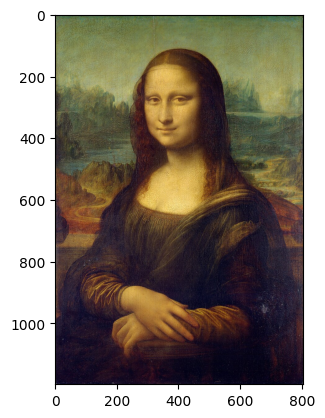

In [82]:
mona_lisa = plt.imread('mona-lisa.jpeg')
plt.imshow(mona_lisa)
plt.show()

In [84]:
# Get the image dimensions
height, width, _ = mona_lisa.shape
# Create the training dataset by sampling random (x, y) coordinates
num_samples = 5000
# Generate unique indices
indices = np.random.choice(width * height, size=num_samples, replace=False) 
# Convert linear indices to 2D coordinates
X_train = indices % width
Y_train = indices // width
# Combine X and Y coordinates
features = np.column_stack((X_train, Y_train))
features

array([[ 29, 787],
       [358, 941],
       [512, 394],
       ...,
       [531, 134],
       [643, 871],
       [323, 285]])

In [85]:
#Pre-processing the output
rgb_train = mona_lisa[Y_train, X_train]

In [86]:
# Ensure values are within the valid range [0, 255]
rgb_train = np.clip(rgb_train, 0, 255)
# # Rescale the pixel intensities to lie between 0.0 and 1.0.
rgb_train = rgb_train / 255.0

In [87]:
# build the final image
from sklearn.ensemble import RandomForestRegressor 
# Create a Random Forest Regressor
rf = RandomForestRegressor()

# Train the model on the training data
rf.fit(features, rgb_train)

RandomForestRegressor()

In [88]:
# Predict RGB values for the entire image
# Create a grid of (x, y) coordinates to generate the final image
X_test, Y_test = np.meshgrid(np.arange(width), np.arange(height))

X_test = X_test.ravel()
Y_test = Y_test.ravel()
test_coordinates = np.column_stack((X_test, Y_test))

# Predict RGB values for all coordinates at once
predicted_rgb_values = rf.predict(test_coordinates)

predicted_rgb_values

array([[0.42447059, 0.50768627, 0.3754902 ],
       [0.42447059, 0.50768627, 0.3754902 ],
       [0.42447059, 0.50768627, 0.3754902 ],
       ...,
       [0.062     , 0.02415686, 0.12043137],
       [0.062     , 0.02415686, 0.12043137],
       [0.062     , 0.02415686, 0.12043137]])

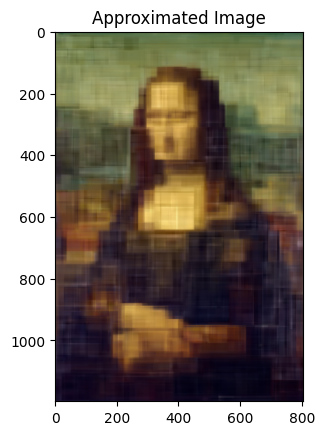

In [89]:
# Rescale the predicted RGB values to the original scale (0-255)
predicted_rgb_values = predicted_rgb_values * 255.0 

# Ensure values are within the valid range [0, 255]
predicted_rgb_values = np.clip(predicted_rgb_values, 0, 255)

# Reshape the predicted RGB values to match the image dimensions
predicted_rgb_values = predicted_rgb_values.reshape((height, width, 3)).astype(np.uint8)

# Display the approximated image
plt.imshow(predicted_rgb_values)
plt.title('Approximated Image')
plt.show()

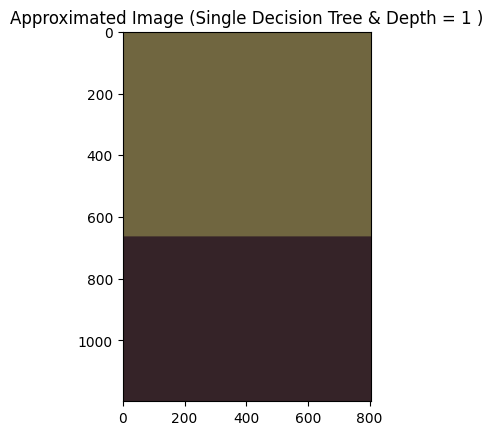

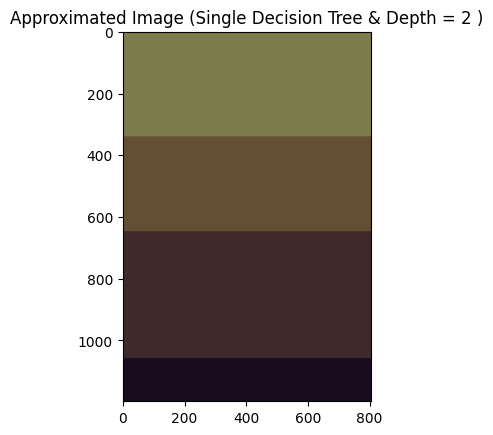

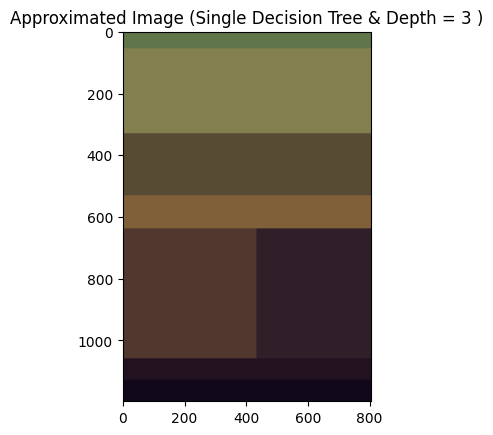

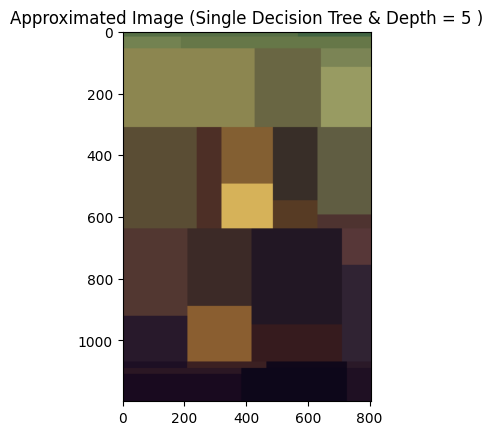

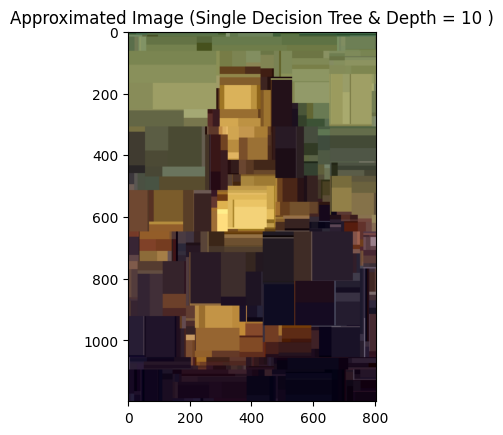

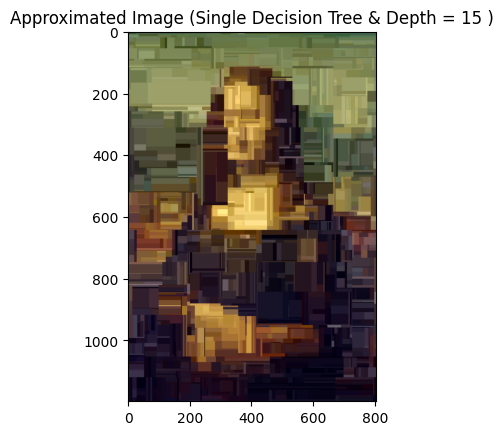

In [90]:
lst = [1,2,3,5,10,15]
for l in range(len(lst)): 
    depth = lst[l]
    # Single decision tree, different depth
    rf = RandomForestRegressor(n_estimators = 1, max_depth = depth)
    rf.fit(features, rgb_train)
    predicted_rgb_values = rf.predict(test_coordinates)
    # Rescale the predicted RGB values to the original scale (0-255)
    predicted_rgb_values = predicted_rgb_values * 255.0
    # Ensure values are within the valid range [0, 255] 
    predicted_rgb_values = np.clip(predicted_rgb_values, 0, 255)
    # Reshape the predicted RGB values to match the image dimensions 
    predicted_rgb_values = predicted_rgb_values.reshape((height, width, 3)).astype(np.uint8)
    # Display the approximated image
    plt.imshow(predicted_rgb_values)
    plt.title('Approximated Image (Single Decision Tree & Depth = ' +str(depth) + ' )')
    plt.show()

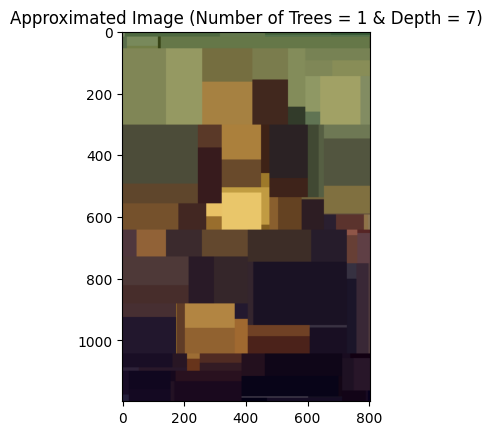

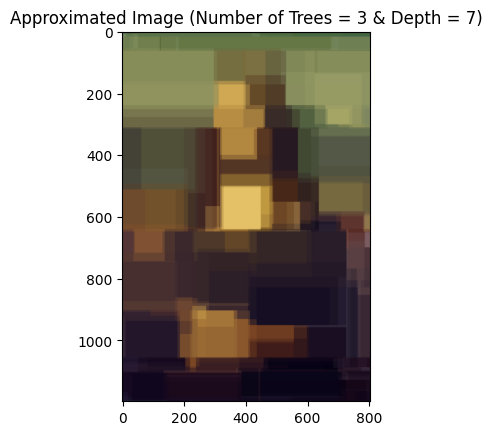

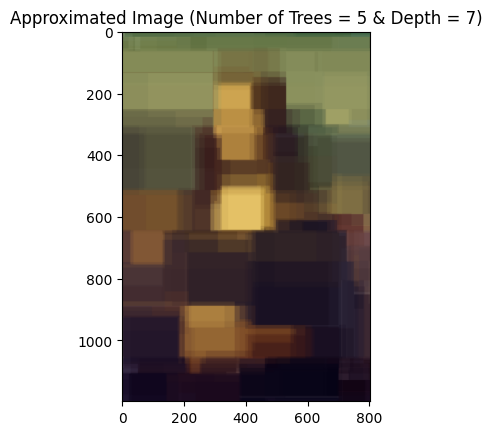

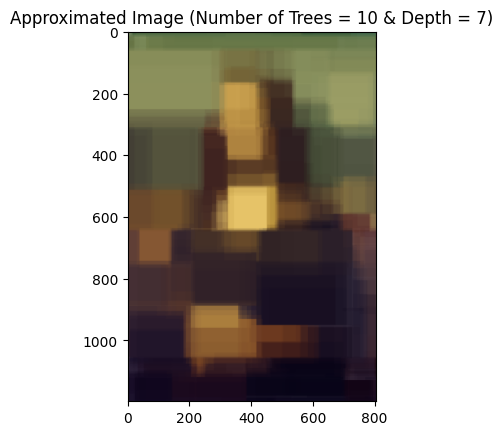

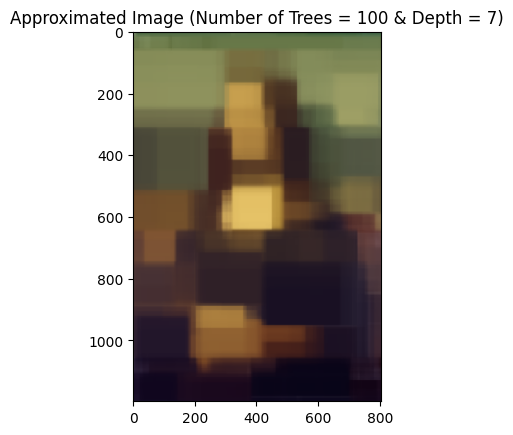

In [91]:
lst = [1,3,5,10,100]
for l in range(len(lst)):
    num_tree = lst[l]
    # Single decision tree, different depth
    rf = RandomForestRegressor(n_estimators = num_tree, max_depth = 7) 
    rf.fit(features, rgb_train)
    predicted_rgb_values = rf.predict(test_coordinates)
    
    # Rescale the predicted RGB values to the original scale (0-255)
    predicted_rgb_values = predicted_rgb_values * 255.0
    # Ensure values are within the valid range [0, 255] 
    predicted_rgb_values = np.clip(predicted_rgb_values, 0, 255)
    # Reshape the predicted RGB values to match the image dimensions 
    predicted_rgb_values = predicted_rgb_values.reshape((height, width, 3)).astype(np.uint8)
    
    # Display the approximated image
    plt.imshow(predicted_rgb_values)
    plt.title('Approximated Image (Number of Trees = '+ str(num_tree) +' & Depth = 7)') 
    plt.show()

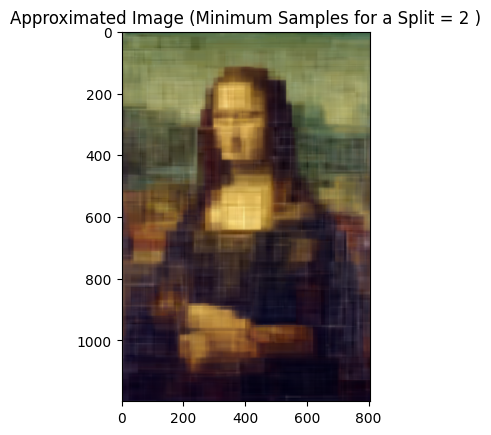

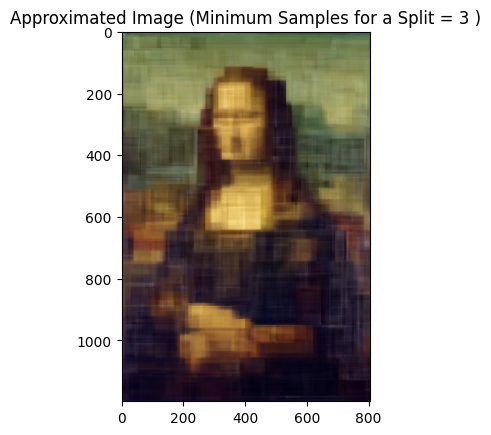

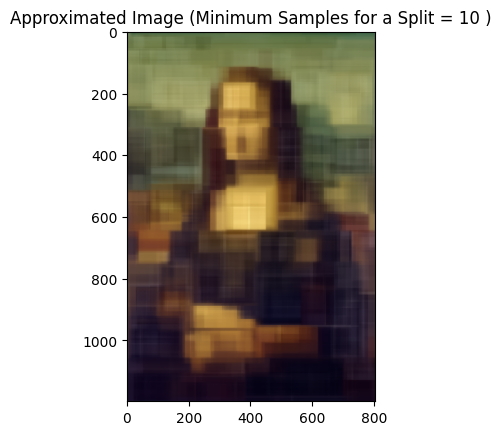

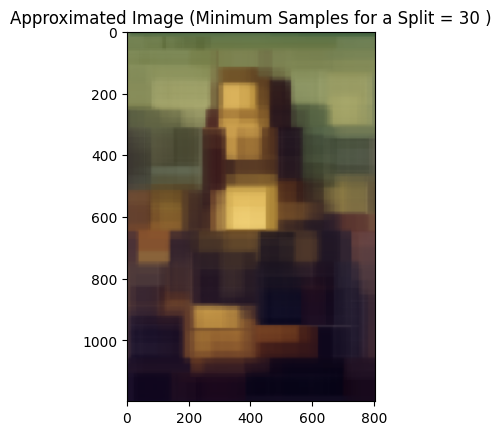

In [92]:
lst = [2,3,10,30]
for l in range(len(lst)):
    split = lst[l]
    # Single decision tree, different depth
    rf = RandomForestRegressor(min_samples_split = split) 
    rf.fit(features, rgb_train)
    predicted_rgb_values = rf.predict(test_coordinates)
    # Rescale the predicted RGB values to the original scale (0-255)
    predicted_rgb_values = predicted_rgb_values * 255.0
    # Ensure values are within the valid range [0, 255] 
    predicted_rgb_values = np.clip(predicted_rgb_values, 0, 255)
    # Reshape the predicted RGB values to match the image dimensions 
    predicted_rgb_values = predicted_rgb_values.reshape((height, width, 3)).astype(np.uint8)
    # Display the approximated image
    plt.imshow(predicted_rgb_values)
    plt.title('Approximated Image (Minimum Samples for a Split = '+ str(split)+ ' )') 
    plt.show()

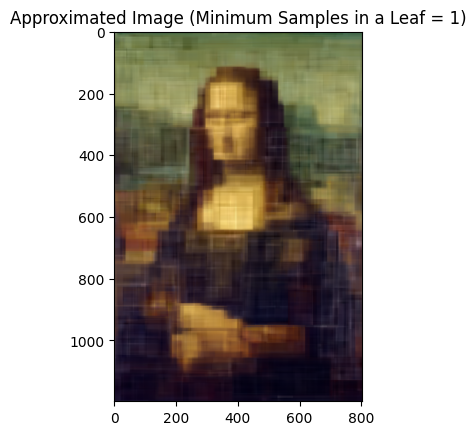

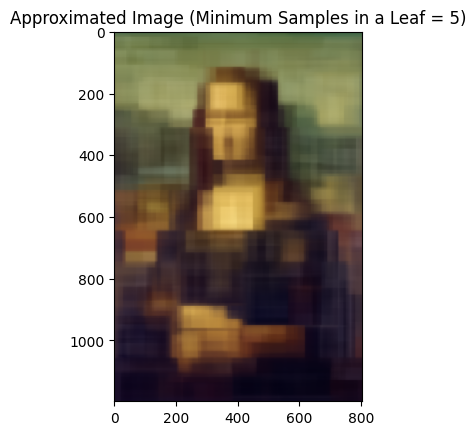

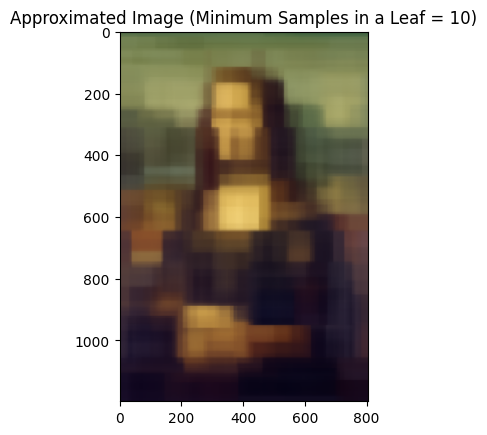

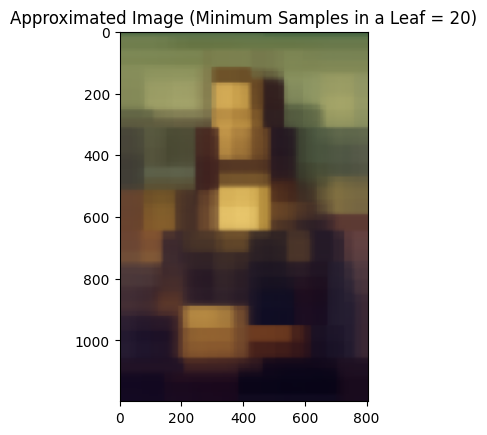

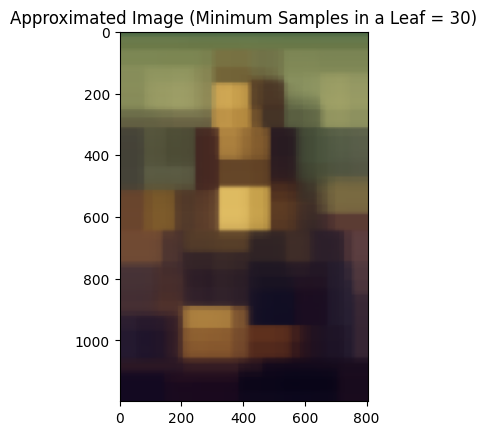

In [94]:
lst = [1, 5, 10, 20, 30] 
for l in range(len(lst)):
    leaf = lst[l]
    # Single decision tree, different depth
    rf = RandomForestRegressor(min_samples_leaf = leaf) 
    rf.fit(features, rgb_train)
    predicted_rgb_values = rf.predict(test_coordinates)
    # Rescale the predicted RGB values to the original scale (0-255)
    predicted_rgb_values = predicted_rgb_values * 255.0
    # Ensure values are within the valid range [0, 255] 
    predicted_rgb_values = np.clip(predicted_rgb_values, 0, 255)
    # Reshape the predicted RGB values to match the image dimensions 
    predicted_rgb_values = predicted_rgb_values.reshape((height, width, 3)).astype(np.uint8)
    # Display the approximated image 
    plt.imshow(predicted_rgb_values)
    plt.title('Approximated Image (Minimum Samples in a Leaf = '+ str(leaf) + ')')
    plt.show()

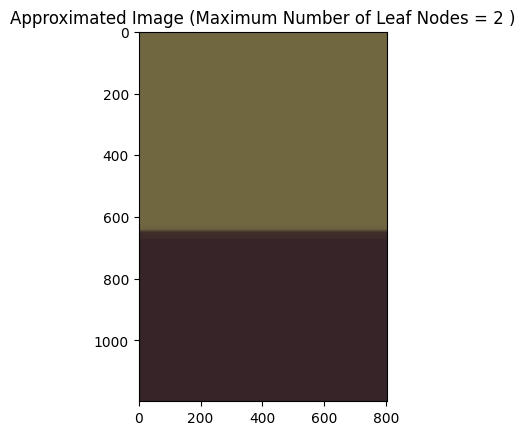

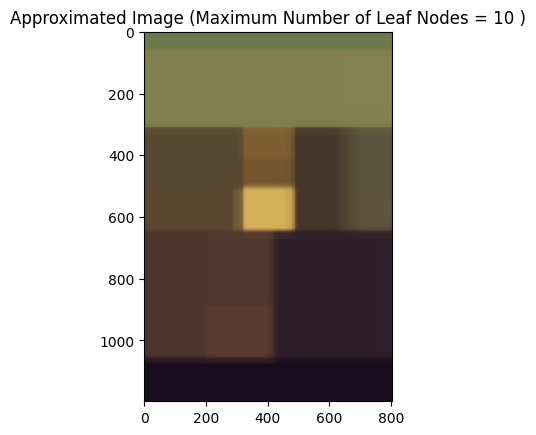

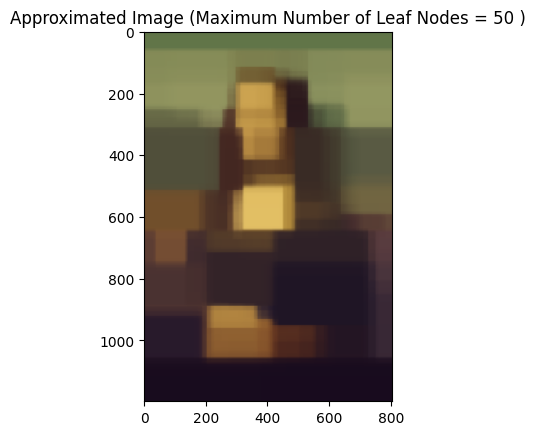

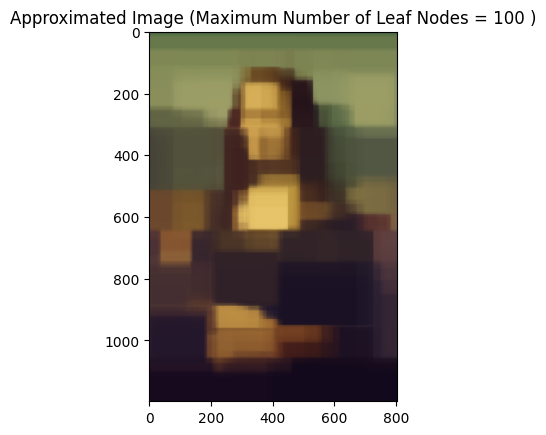

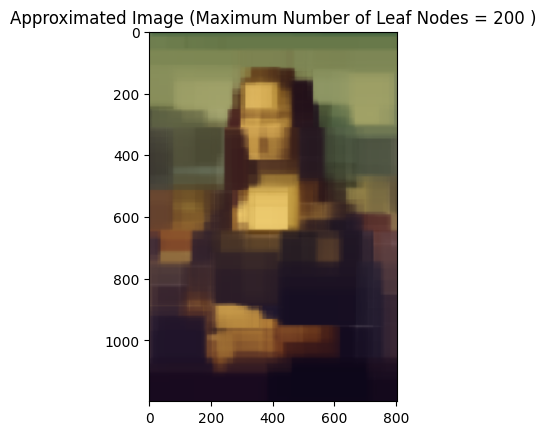

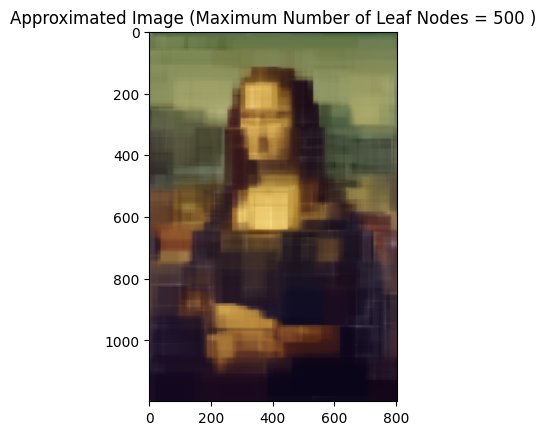

In [95]:
lst = [2, 10, 50, 100, 200, 500] 
for l in range(len(lst)):
    node = lst[l]
    # Single decision tree, different depth
    rf = RandomForestRegressor(max_leaf_nodes = node) 
    rf.fit(features, rgb_train)
    predicted_rgb_values = rf.predict(test_coordinates)
    # Rescale the predicted RGB values to the original scale (0-255)
    predicted_rgb_values = predicted_rgb_values * 255.0
    # Ensure values are within the valid range [0, 255] 
    predicted_rgb_values = np.clip(predicted_rgb_values, 0, 255)
    # Reshape the predicted RGB values to match the image dimensions 
    predicted_rgb_values = predicted_rgb_values.reshape((height, width, 3)).astype(np.uint8)
    # Display the approximated image 
    plt.imshow(predicted_rgb_values)
    plt.title('Approximated Image (Maximum Number of Leaf Nodes = '+ str(node) + ' )')
    plt.show()

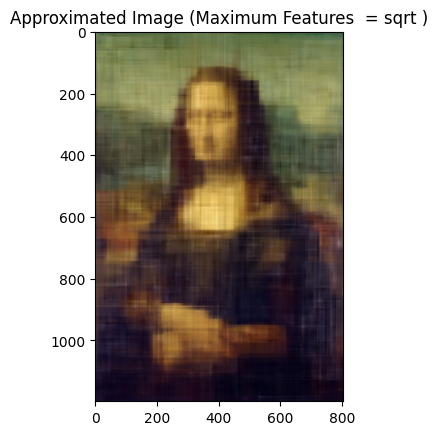

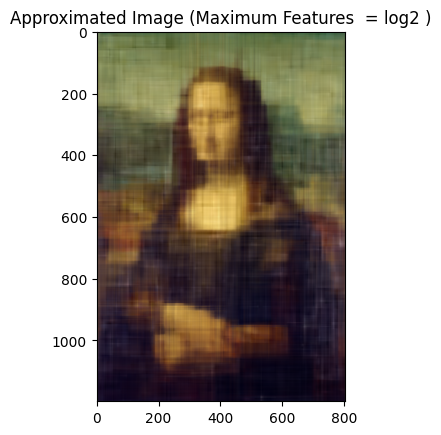

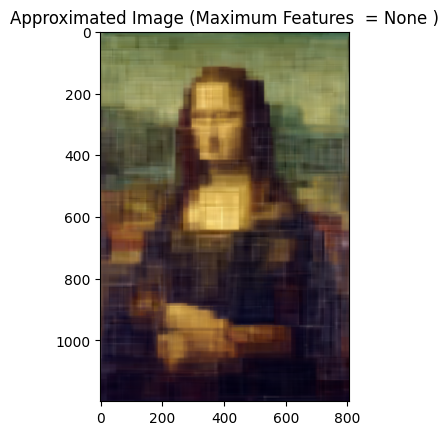

In [96]:
lst = ["sqrt", "log2", None] 
for l in range(len(lst)):
    n_feature = lst[l]
    # Single decision tree, different depth
    rf = RandomForestRegressor(max_features = n_feature) 
    rf.fit(features, rgb_train)
    predicted_rgb_values = rf.predict(test_coordinates)
    # Rescale the predicted RGB values to the original scale (0-255)
    predicted_rgb_values = predicted_rgb_values * 255.0
    # Ensure values are within the valid range [0, 255] 
    predicted_rgb_values = np.clip(predicted_rgb_values, 0, 255)
    # Reshape the predicted RGB values to match the image dimensions 
    predicted_rgb_values = predicted_rgb_values.reshape((height, width, 3)).astype(np.uint8)
    # Display the approximated image 
    plt.imshow(predicted_rgb_values)
    plt.title('Approximated Image (Maximum Features  = '+ str(n_feature) + ' )')
    plt.show()

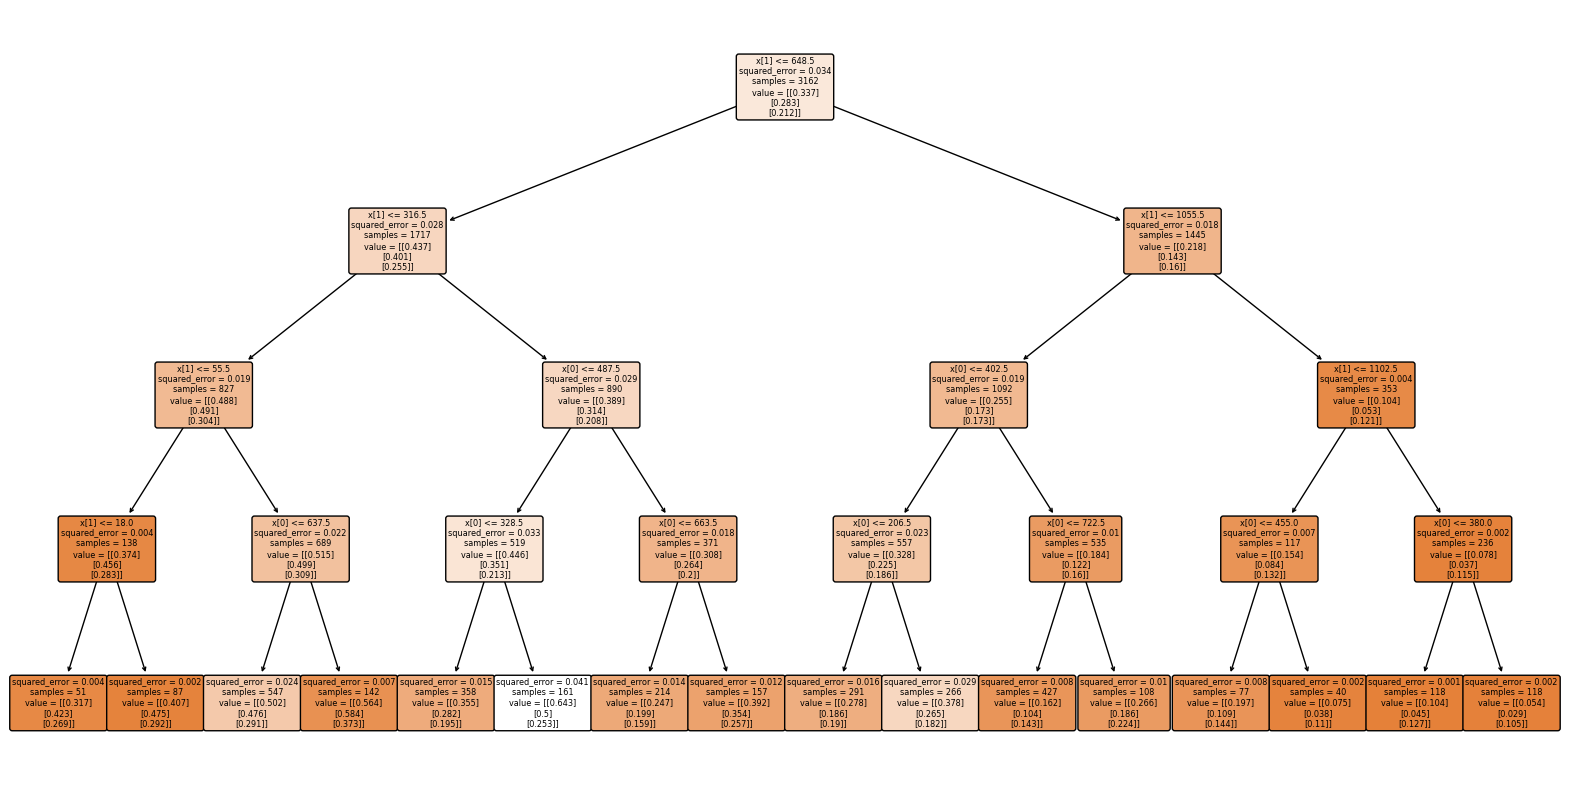

In [97]:
# For the demonstration purpose, I will use a model with a setting of a single tree and depth =4 to visualize and then answer the question.
# Create a Random Forest Regressor
rf = RandomForestRegressor(n_estimators = 1, max_depth = 4) 
# Train the model on the training data
rf.fit(features, rgb_train)
tree = rf.estimators_[0]
from sklearn.tree import plot_tree
plt.figure(figsize=(20,10)) 
plot_tree(tree, filled=True, rounded=True) 
plt.show()